In [1]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv('../../files-dataframes/owid-covid-data.csv')
df = pd.DataFrame(csv)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


## Como foi a evolução mundial da COVID-19?


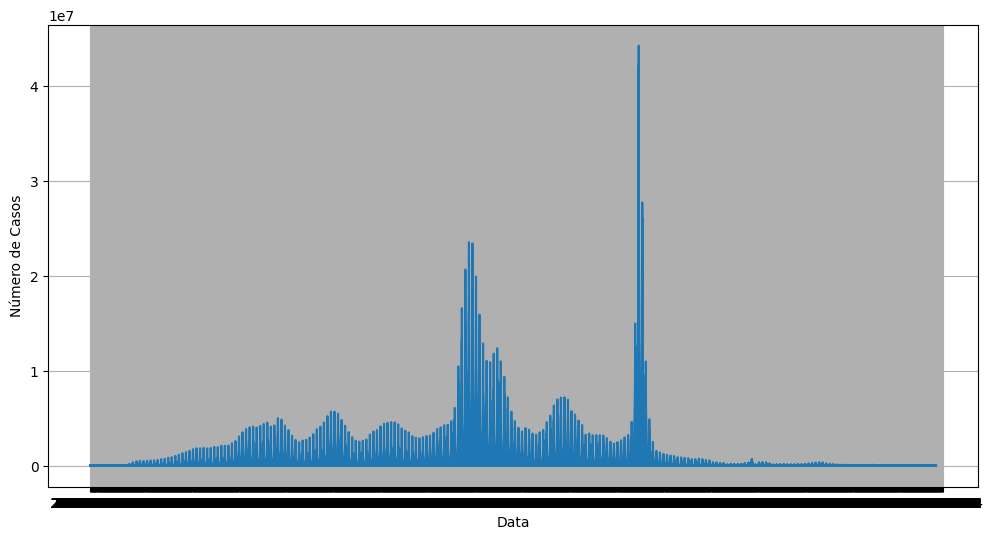

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], label='Casos diários')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()

In [3]:
# A evolução mundial da covid-19 é representada neste gráfico com picos de contagio durante alguns periodos

## Quais são os 5 países com mais casos e mortes acumulados?

In [4]:
df = df.drop(df[df['location'] == 'World'].index)
df = df.drop(df[df['location'] == ''].index)
df = df.drop(df[df['total_deaths'] == ''].index)
df = df.dropna(subset=['total_deaths'])
df = df.drop(df[df['location'] == 'High-income countries'].index)
df = df.drop(df[df['location'] == 'Upper-middle-income countries'].index)
df = df.drop(df[df['location'] == 'Europe'].index)
df = df.drop(df[df['location'] == 'North America'].index)
df = df.drop(df[df['location'] == 'Asia'].index)
df = df.drop(df[df['location'] == 'South America'].index)
df = df.drop(df[df['location'] == 'European Union (27)'].index)
df = df.drop(df[df['location'] == 'Lower-middle-income countries'].index)

In [5]:
df_unique_countries = df.loc[df.groupby('location')['total_deaths'].idxmax()]
df_sorted = df_unique_countries.sort_values(by='total_deaths', ascending=False)
top_5_countries = df_sorted.head(5)
print(top_5_countries[['location', 'total_deaths']])

             location  total_deaths
405124  United States     1193165.0
51459          Brazil      702116.0
175208          India      533623.0
317756         Russia      403188.0
245364         Mexico      334551.0


## Quais são os 5 países mais avançados em relação à vacinação da população?

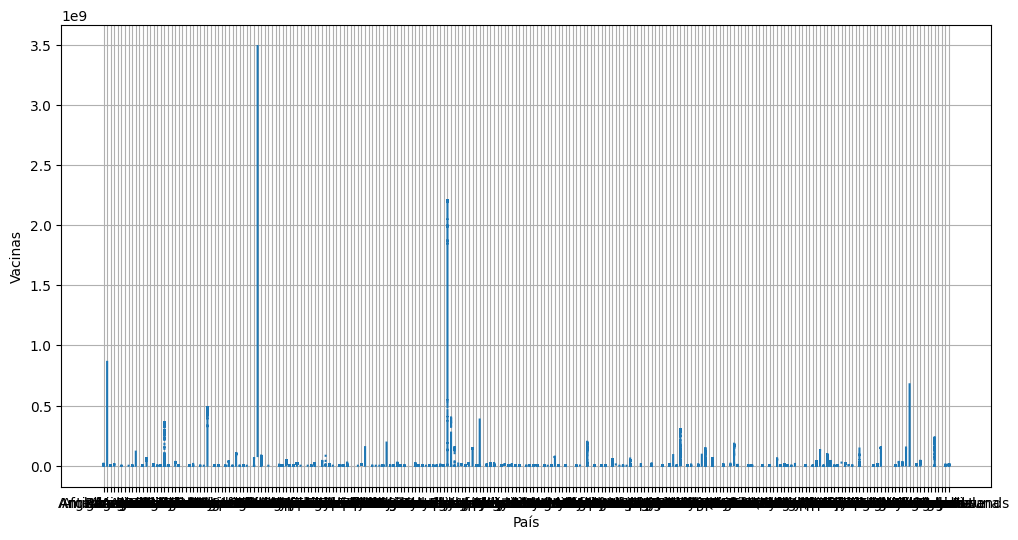

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['location'], df['total_vaccinations'], label='Casos diários')
plt.xlabel('País')
plt.ylabel('Vacinas')
plt.grid(True)
plt.show()

## Quais são os 5 estados brasileiros com mais casos e mortes acumuladas?

In [7]:
csv_br = pd.read_csv('../../files-dataframes/cases-brazil-total.csv')
br_df = pd.DataFrame(csv_br)
br_df

,country,state,totalCases,totalCasesMS,notConfirmedByMS,deaths,deathsMS,URL,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,...,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,date,newCases,newDeaths
0,Brazil,TOTAL,37085520,37085520,0,699310,699310,https://covid.saude.gov.br/,327.82568,17385.11647,...,86.19512,170385963,79.87430,5759211,2.69983,126348017,59.22999,2023-03-18,0,0
1,Brazil,AC,160452,160452,0,2043,2043,http://saude.acre.gov.br/,231.64972,18193.17750,...,78.75388,607656,68.90032,13768,1.56111,388810,44.08602,2023-03-18,0,0
2,Brazil,AL,337568,337568,0,7242,7242,http://cidadao.saude.al.gov.br/,216.99806,10114.83039,...,78.42982,2271143,68.05214,58151,1.74243,1453763,43.56031,2023-03-18,0,0
3,Brazil,AM,631976,631976,0,14443,14443,http://www.amazonas.am.gov.br/,348.47779,15248.18939,...,80.46358,2856226,68.91444,84223,2.03212,1954567,47.15940,2023-03-18,0,0
4,Brazil,AP,185673,185673,0,2167,2167,https://saude.portal.ap.gov.br/,256.22804,21954.14381,...,73.37108,531674,62.86562,17200,2.03374,320247,37.86630,2023-03-18,0,0
5,Brazil,BA,1792572,1792572,0,31459,31459,http://www.saude.ba.gov.br/,211.51660,12052.47285,...,78.53799,10568359,71.05704,284439,1.91244,8038266,54.04580,2023-03-18,0,0
6,Brazil,CE,1453417,1453417,0,28157,28157,https://www.saude.ce.gov.br,308.33070,15915.51233,...,94.96480,7837839,85.82755,284590,3.11638,5613927,61.47480,2023-03-18,0,0
7,Brazil,DF,898072,898072,0,11845,11845,http://www.saude.df.gov.br/coronavirus/,392.83407,29784.15186,...,92.92487,2426080,80.45985,350014,11.60806,1859780,61.67876,2023-03-18,0,0
8,Brazil,ES,1323595,1323595,0,15041,15041,https://saude.es.gov.br/,374.27992,32936.30946,...,86.67869,3131520,77.92468,126919,3.15825,2257968,56.18723,2023-03-18,0,0
9,Brazil,GO,1900459,1900459,0,28041,28041,http://www.saude.go.gov.br/,399.53813,27078.41468,...,84.81484,5420118,77.22777,166233,2.36855,3940789,56.14976,2023-03-18,0,0


In [13]:
br_df = br_df.drop(br_df[br_df['state'] == 'TOTAL'].index)
states = br_df.loc[br_df.groupby('state')['deaths'].idxmax()]
br_df_sorted = states.sort_values(by='deaths', ascending=False)
top_5_states = br_df_sorted.head(5)
print(top_5_states[['state', 'deaths']])

   state  deaths
26    SP  179039
19    RJ   76852
11    MG   65507
18    PR   46022
23    RS   41921


In [14]:
br_df = br_df.drop(br_df[br_df['state'] == 'TOTAL'].index)
states = br_df.loc[br_df.groupby('state')['totalCases'].idxmax()]
br_df_sorted = states.sort_values(by='totalCases', ascending=False)
top_5_states = br_df_sorted.head(5)
print(top_5_states[['state', 'totalCases']])

   state  totalCases
26    SP     6469442
11    MG     4189760
23    RS     2962414
18    PR     2920177
19    RJ     2754359
